In [1]:
## import libraries 3.12.4 opt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from scipy.stats import linregress

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import pingouin as pg

In [2]:
# file1='/Volumes/Alice_Data/VCID/VCID_aim1+2_rating_3s.xlsx'
file2='/Volumes/Alice_Data/VCID/VCID_CBF_aim1+2_combine.xlsx'
file6='/Volumes/Alice_Data/VCID/VCID_OBF_aim1+2_combine.xlsx'
df=pd.read_excel(file2,sheet_name='Sheet1')
df=df.dropna(how='any')
df.columns=df.columns.str.strip()

obf=pd.read_excel(file6, sheet_name='aim1_rating12')
obf = obf.dropna(how='any')

obf_012=pd.read_excel(file6, sheet_name='aim1')
obf_012=obf_012.dropna(how='any')

In [3]:
# rbf_rating2.shape
# df_rbf = pd.merge(df,obf, on=['SUBID'], how='')
df_rbf = df[df['SUBID'].isin(obf['SUBID'])]


In [4]:
# First, create separate dataframes for Session 1 and 2
s1_data = obf[obf['Session']==1][['bilateralRBF', 'Source']]
s2_data = obf[obf['Session']==2][['bilateralRBF', 'Source']]

# Reset index to align the data
s1_data.reset_index(drop=True, inplace=True)
s2_data.reset_index(drop=True, inplace=True)

# Create a combined dataframe for plotting
plot_data = pd.DataFrame({
    'Session1': s1_data['bilateralRBF'],
    'Session2': s2_data['bilateralRBF'],
    'Source': s1_data['Source']
})

In [5]:
xc=obf[obf['Session']==1]['bilateralRBF']
yc=obf[obf['Session']==2]['bilateralRBF']
x_rcbf=df_rbf.iloc[:,1]
y_rcbf=df_rbf.iloc[:,8]
print(xc.shape,yc.shape)
print(x_rcbf.shape,y_rcbf.shape)
df_rbf



(22,) (22,)
(22,) (22,)


,SUBID,Global CBF,GM CBF,WM CBF,PVWM15 CBF,PVWM12.5 CBF,Putamen CBF,QEI,Global CBF.1,GM CBF .1,WM CBF .1,PVWM15 CBF .1,PVWM12.5 CBF .1,Putamen CBF.1,QEI.1,Source
59,HC002,37.93,43.73,29.12,18.84,17.30,37.01,0.91,39.21,44.92,30.31,19.74,18.27,37.91,0.90,UPenn
60,HC003,52.67,61.02,37.21,27.37,27.24,40.18,0.92,48.22,55.83,34.14,24.80,24.60,39.82,0.92,UPenn
61,HC004,40.99,47.97,30.76,18.94,17.72,38.00,0.89,35.51,41.55,26.69,16.66,15.34,32.66,0.90,UPenn
62,HC005,51.82,61.52,36.97,23.94,23.46,44.17,0.89,51.31,59.61,38.24,25.01,24.88,42.97,0.89,UPenn
63,HC006,38.83,45.29,27.73,17.10,15.76,32.34,0.91,44.41,52.25,30.96,17.93,16.28,40.01,0.91,UPenn
64,HC007,45.36,53.11,30.12,20.67,20.27,37.41,0.91,52.92,62.09,35.18,23.84,23.23,43.09,0.91,UPenn
65,HC008,53.44,64.94,36.93,22.94,20.68,43.14,0.90,51.36,61.55,36.83,23.90,21.73,42.56,0.90,UPenn
66,HC009,43.14,51.53,29.70,19.66,18.76,40.13,0.88,48.79,58.54,33.70,23.23,22.08,47.30,0.87,UPenn
67,HC010,29.83,35.55,20.94,12.49,11.45,30.21,0.88,34.73,41.24,24.10,14.76,13.77,34.45,0.89,UPenn
68,HC011,63.04,73.44,45.20,31.25,31.33,49.33,0.90,62.43,73.59,43.81,30.32,30.05,48.28,0.90,UPenn


In [6]:
y1=['Session2']
x1=['Session1']
plot_data['Source_x'] = plot_data['Source'].astype('category').cat.codes

# df_octa_with_vs[]
results_x = sm.OLS(plot_data[x1[0]], sm.add_constant(plot_data[['Source_x']])).fit()
results_y = sm.OLS(plot_data[y1[0]], sm.add_constant(plot_data[['Source_x']])).fit()
plot_data[f'{x1[0]}_adj'] = plot_data[x1[0]] - (results_x.params['Source_x'] * (plot_data['Source_x'] - plot_data['Source_x'].mean())) 
plot_data[f'{y1[0]}_adj'] = plot_data[y1[0]] - (results_y.params['Source_x'] * (plot_data['Source_x'] - plot_data['Source_x'].mean()))

In [7]:
x1=['GM CBF']
y1=['GM CBF .1']
df_rbf['Source_x'] = df_rbf['Source'].astype('category').cat.codes

results_x = sm.OLS(df_rbf[x1[0]], sm.add_constant(df_rbf[['Source_x']])).fit()
results_y = sm.OLS(df_rbf[y1[0]], sm.add_constant(df_rbf[['Source_x']])).fit()
df_rbf[f'{x1[0]}_adj'] = df_rbf[x1[0]] - (results_x.params['Source_x'] * (df_rbf['Source_x'] - df_rbf['Source_x'].mean())) 
df_rbf[f'{y1[0]}_adj'] = df_rbf[y1[0]] - (results_y.params['Source_x'] * (df_rbf['Source_x'] - df_rbf['Source_x'].mean()))

/var/folders/t8/0kz015v149dgh79mvjsl1t500000gn/T/ipykernel_60309/4068075516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rbf['Source_x'] = df_rbf['Source'].astype('category').cat.codes
/var/folders/t8/0kz015v149dgh79mvjsl1t500000gn/T/ipykernel_60309/4068075516.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rbf[f'{x1[0]}_adj'] = df_rbf[x1[0]] - (results_x.params['Source_x'] * (df_rbf['Source_x'] - df_rbf['Source_x'].mean()))
/var/folders/t8/0kz015v149dgh79mvjsl1t500000gn/T/ipykernel_60309/4

In [8]:
### Intraclass correlation coefficients
df_long = pd.melt(plot_data.reset_index(), id_vars='index', value_vars=['Session1_adj', 'Session2_adj'],
                  var_name='rater', value_name='rating')
df_long = df_long.rename(columns={'index': 'target'})
icc = pg.intraclass_corr(data=df_long, targets='target', raters='rater', ratings='rating')
icc_result = icc.set_index('Type').loc['ICC2k']
print(f"ICC: {icc_result['ICC']:.4f}")
print(f"95% Confidence Interval: {icc_result['CI95%']}")
print(f"F-value: {icc_result['F']:.3f}")
print(f"p-value: {icc_result['pval']:.3f}")

ICC: 0.8182
95% Confidence Interval: [0.57 0.92]
F-value: 5.520
p-value: 0.000


In [9]:
### t-test
first_measure = np.array(plot_data['Session1'])  # First set of measurements
second_measure = np.array(plot_data['Session2'])  # Second set of measurements
t_statistic, p_value = stats.ttest_rel(first_measure,second_measure)
differences=second_measure - first_measure
bias = np.mean(differences)
std_dev = np.std(differences, ddof=1)
loa_lower = bias - 1.96 * std_dev
loa_upper = bias + 1.96 * std_dev
n = len(differences)
se_bias = std_dev / np.sqrt(n)
se_loa = np.sqrt(3 * std_dev**2 / n)

dof = n - 1
t_value = stats.t.ppf(0.975, dof)

ci_bias = (bias - t_value * se_bias, bias + t_value * se_bias)
ci_loa_lower = (loa_lower - t_value * se_loa, loa_lower + t_value * se_loa)
ci_loa_upper = (loa_upper - t_value * se_loa, loa_upper + t_value * se_loa)
print(f"Paired T-Test: t = {t_statistic:.4f}, p = {p_value:.4f}")
print(f"Bias: {bias:.4f}")
print(f"95% CI for Bias: ({ci_bias[0]:.4f}, {ci_bias[1]:.4f})")
print(f"95% Limits of Agreement: ({loa_lower:.4f}, {loa_upper:.4f})")
print(f"95% CI for Lower LOA: ({ci_loa_lower[0]:.4f}, {ci_loa_lower[1]:.4f})")
print(f"95% CI for Upper LOA: ({ci_loa_upper[0]:.4f}, {ci_loa_upper[1]:.4f})")
print('differences', np.mean(differences));print(dof)

Paired T-Test: t = -1.0098, p = 0.3241
Bias: 2.7072
95% CI for Bias: (-2.8682, 8.2827)
95% Limits of Agreement: (-21.9398, 27.3543)
95% CI for Lower LOA: (-31.5968, -12.2828)
95% CI for Upper LOA: (17.6973, 37.0113)
differences 2.707242434928255
21


In [10]:
def Bland_Altman (df,column1,column2):
    data1=df[column1]
    data2=df[column2]
    mean = (data1 + data2) / 2
    diff = data1 - data2
    md = np.mean(diff)
    sd = np.std(diff, axis=0)
    diff = data1 - data2
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    limits_of_agreement = (mean_diff - 1.96 * std_diff, mean_diff + 1.96 * std_diff)
    return mean, diff, md, limits_of_agreement

mean1, diff1, md1, limits_of_agreement1 = Bland_Altman(df_rbf,'GM CBF_adj','GM CBF .1_adj')
mean2, diff2, md2, limits_of_agreement2 = Bland_Altman(plot_data,'Session1_adj','Session2_adj')
mean=[mean1,mean2]
diff=[diff1,diff2]
md=[md1,md2]
limits_of_agreement=[limits_of_agreement1,limits_of_agreement2]
print('limits_of_agreement', limits_of_agreement)

limits_of_agreement [(-13.187264848074868, 10.526355757165767), (-25.971258349082788, 20.55677347922628)]


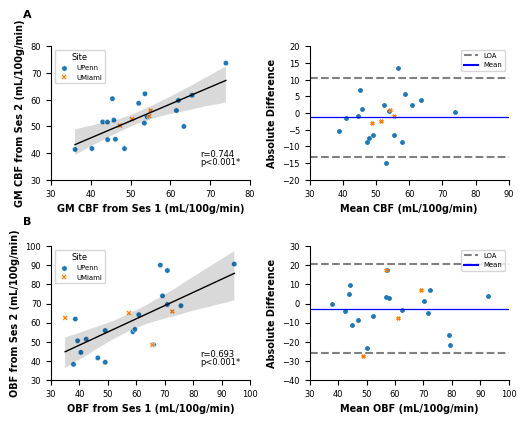

In [27]:
# Assuming plot_data, df_rbf, mean, diff, limits_of_agreement, md are defined elsewhere
width_in = 150 / 25.4  # ~7.87 in (increased from 6.85 in)
height_in = 110 / 25.4  # ~3.15 in (adjusted for two rows)
fig, ax = plt.subplots(2, 2, figsize=(width_in, height_in), sharey=False)
plt.subplots_adjust(wspace=0.5, hspace=0.4)  # Match wspace from create_obf_vs_gm_cbf_plots, add hspace for rows

# Define color and marker maps
color_map = {'UPenn': '#1f77b4', 'UMiami': '#ff7f0e'}
marker_map = {'UPenn': 'o', 'UMiami': 'x'}  # UPenn: dots, UMiami: crosses
colors = [color_map[source] for source in plot_data['Source']]

# Scatterplot for OBF (bottom left, ax[1,0])
sns.scatterplot(x='Session1_adj', y='Session2_adj', data=plot_data, 
                hue='Source', style='Source', palette={'UPenn': '#1f77b4', 'UMiami': '#ff7f0e'},
                s=15, ax=ax[1,0])
sns.regplot(x='Session1_adj', y='Session2_adj', data=plot_data,
            scatter=False, line_kws={'color': 'black', 'linewidth': 1}, 
            ax=ax[1,0])

slope, intercept, r_value, p_value, std_err = linregress(plot_data['Session1_adj'], 
                                                        plot_data['Session2_adj'])
ax[1,0].annotate(f'r={r_value:.3f}', xy=(0.75, 0.17), xycoords='axes fraction', fontsize=6, color='black')
ax[1,0].annotate(f'p<0.001*', xy=(0.75, 0.11), xycoords='axes fraction', fontsize=6, color='black')

# Scatterplot for GM CBF (top left, ax[0,0])
sns.scatterplot(x='GM CBF_adj', y='GM CBF .1_adj', data=df_rbf, hue='Source', style='Source',
                palette={'UPenn': '#1f77b4', 'UMiami': '#ff7f0e'}, s=15, ax=ax[0,0])
sns.regplot(x='GM CBF_adj', y='GM CBF .1_adj', data=df_rbf, scatter=False, 
            line_kws={'color': 'black', 'linewidth': 1}, ax=ax[0,0])

slope, intercept, r_value, p_value, std_err = linregress(df_rbf['GM CBF_adj'], df_rbf['GM CBF .1_adj'])
ax[0,0].annotate(f'r={r_value:.3f}', xy=(0.75, 0.17), xycoords='axes fraction', fontsize=6, color='black')
ax[0,0].annotate(f'p<0.001*', xy=(0.75, 0.11), xycoords='axes fraction', fontsize=6, color='black')

# Set axis limits and labels for scatterplots
ax[1,0].set_ylim(30, 100)
ax[1,0].set_xlim(30, 100)
ax[0,0].set_ylim(30, 80)
ax[0,0].set_xlim(30, 80)
ax[1,0].set_xlabel('OBF from Ses 1 (mL/100g/min)', fontsize=7, fontweight='bold')
ax[1,0].set_ylabel('OBF from Ses 2 (mL/100g/min)', fontsize=7, fontweight='bold')
ax[0,0].set_xlabel('GM CBF from Ses 1 (mL/100g/min)', fontsize=7, fontweight='bold')
ax[0,0].set_ylabel('GM CBF from Ses 2 (mL/100g/min)', fontsize=7, fontweight='bold')

# Bland-Altman plots (right column, ax[i,1])
for i in range(2):
    # Separate data by source for marker differentiation
    for source in ['UPenn', 'UMiami']:
        mask = [s == source for s in plot_data['Source']]
        source_mean = [m for m, msk in zip(mean[i], mask) if msk]
        source_diff = [d for d, msk in zip(diff[i], mask) if msk]
        source_color = color_map[source]
        source_marker = marker_map[source]

        # Scatter with matching style (marker, color, size)
        ax[i,1].scatter(source_mean, source_diff, c=source_color, marker=source_marker, s=6)

    # Add LOA and mean lines
    ax[i,1].axhline(limits_of_agreement[i][1], color='gray', linestyle='--', label='LOA')
    ax[i,1].axhline(limits_of_agreement[i][0], color='gray', linestyle='--')
    ax[i,1].axhline(md[i], color='blue', linestyle='-', linewidth=0.9, label='Mean')  
    ax[i,0].tick_params(axis='both', labelsize=6) # Set aspect ratio to 1:1 for better visualization
    ax[i,1].tick_params(axis='both', labelsize=6)
    # Styling
    ax[i,1].spines['top'].set_visible(False)
    ax[i,1].spines['right'].set_visible(False)

    # Labels
    ax[1,1].set_xlabel('Mean OBF (mL/100g/min)', fontsize=7, fontweight='bold')
    ax[0,1].set_xlabel('Mean CBF (mL/100g/min)', fontsize=7, fontweight='bold')
    ax[i,1].set_ylabel('Absolute Difference', fontsize=7, fontweight='bold')

    # Legend with only LOA and Mean (no site legends)
    ax[i,1].legend(handles=[
        plt.Line2D([0], [0], color='gray', linestyle='--', label='LOA'),
        plt.Line2D([0], [0], color='blue', linestyle='-', label='Mean')
    ], loc='upper right',title_fontsize=6, fontsize=5)

    # Styling for ax[i,0]
    ax[i,0].spines['top'].set_visible(False)
    ax[i,0].spines['right'].set_visible(False)
    ax[i,0].legend(title='Site', loc='upper left',title_fontsize=6, fontsize=5)


# Set axis limits for Bland-Altman plots
ax[1,1].set_xlim(30, 100)
ax[0,1].set_ylim(-20, 20)
ax[1,1].set_ylim(-40, 30)
ax[0,1].set_xlim(30, 90)
# Add subplot labels
fig.text(-0.12, 1.2, 'A', transform=ax[0,0].transAxes, fontsize=8, fontweight='bold', va='bottom', ha='center')
fig.text(-0.12, 1.15, 'B', transform=ax[1,0].transAxes, fontsize=8, fontweight='bold', va='bottom', ha='center')

# Adjust layout and save
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.savefig('/Volumes/Alice_Data/VCID/Fig.2_Bland-Altman.png', dpi=300, bbox_inches='tight')
plt.show()

0.0026234716370639745
9.381428413999809e-06


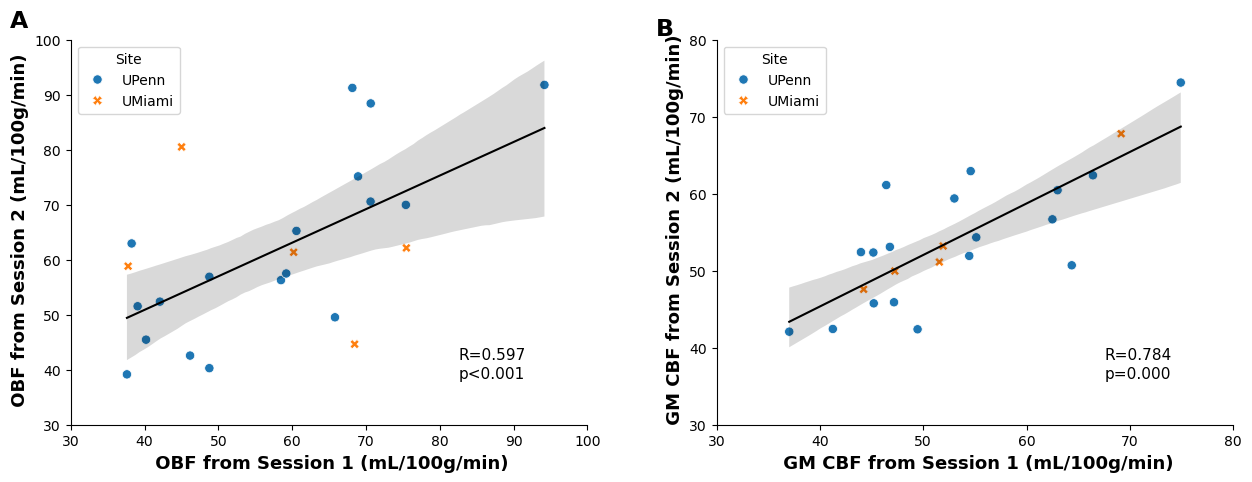

In [ ]:
# xc=obf[obf['Session']==1]['bilateralRBF']
# yc=obf[obf['Session']==2]['bilateralRBF']

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.25)
sns.scatterplot(x='Session1_adj', y='Session2_adj', data=plot_data, 
                hue='Source', style='Source', palette={'UPenn': '#1f77b4', 'UMiami': '#ff7f0e'},
                s=45, ax=ax[0])
sns.regplot(x='Session1_adj', y='Session2_adj', data=plot_data,
            scatter=False, line_kws={'color': 'black', 'linewidth': 1.5}, 
            ax=ax[0])

slope, intercept, r_value, p_value, std_err = linregress(plot_data['Session1_adj'], 
                                                        plot_data['Session2_adj'])
print(p_value)
ax[0].annotate(f'R={r_value:.3f}', xy=(0.75, 0.17), xycoords='axes fraction', fontsize=11, color='black')
ax[0].annotate(f'p<0.001', xy=(0.75, 0.12), xycoords='axes fraction', fontsize=11, color='black')

sns.scatterplot(x='GM CBF_adj', y='GM CBF .1_adj', data=df_rbf, hue='Source', style='Source',palette={'UPenn': '#1f77b4', 'UMiami': '#ff7f0e'},
                 s=45,ax=ax[1]) 
sns.regplot(x='GM CBF_adj', y='GM CBF .1_adj',data=df_rbf,scatter=False, line_kws={'color': 'black' ,'linewidth': 1.5},ax=ax[1] )    
# Perform linear regression and get the R and p-values
slope, intercept, r_value, p_value, std_err = linregress(df_rbf['GM CBF_adj'], df_rbf['GM CBF .1_adj'])
ax[1].annotate(f'R={r_value:.3f}', xy=(0.75, 0.17), xycoords='axes fraction', fontsize=11, color='black')
ax[1].annotate(f'p={p_value:.3f}', xy=(0.75, 0.12), xycoords='axes fraction', fontsize=11, color='black')
print(p_value)


for i in range(2):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[0].set_ylim(30, 100)
    ax[0].set_xlim(30, 100)
    ax[1].set_ylim(30, 80)
    ax[1].set_xlim(30, 80)
    ax[0].set_xlabel(' OBF from Session 1 (mL/100g/min)',fontsize=13, fontweight='bold')
    ax[0].set_ylabel(' OBF from Session 2 (mL/100g/min)',fontsize=13, fontweight='bold')
    ax[1].set_xlabel(' GM CBF from Session 1 (mL/100g/min)',fontsize=13, fontweight='bold')
    ax[1].set_ylabel(' GM CBF from Session 2 (mL/100g/min)',fontsize=13, fontweight='bold')

    ax[i].legend(title='Site', loc='upper left')    

fig.text(-0.1, 1.02, 'A', transform=ax[0].transAxes, 
         fontsize=17, fontweight='bold', va='bottom', ha='center')
fig.text(-0.1, 1.0, 'B', transform=ax[1].transAxes, 
         fontsize=17, fontweight='bold', va='bottom', ha='center')

# plt.tight_layout()
# plt.savefig('/Users/aliceqichaowu/Desktop/Detre_Lab/Sudipto_VCID_project/Figures/Figures2_all_adj', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
xc='bilateralOBF_1'
yc='bilateralOBF_2'
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
slope, intercept, r_value, p_value, std_err = linregress(rbf[xc],obf[yc])
sns.scatterplot(x=xc, y=yc, data=rbf, s=45,  ax=ax)
sns.regplot(x=xc, y=yc, data=rbf,  scatter=False,  line_kws={'color': 'black' ,'linewidth': 1.5}, ax=ax)
ax.annotate(f'R={r_value:.3f}', xy=(0.08, 0.90), xycoords='axes fraction', fontsize=11, color='black')
ax.annotate(f'p={p_value:.3f}', xy=(0.08, 0.85), xycoords='axes fraction', fontsize=11, color='black')

In [ ]:

# rbf = rbf_3s
rows_with_twos = ratings[ratings.eq(2.0).all(axis=1)]
rows_with_ones = ratings[ratings.eq(1.0).any(axis=1)]
rows_with_ones_twos = ratings[ratings.isin([1.0,2.0]).all(axis=1)]
rbf_twos=rbf.loc[rbf['subid_all'].isin(rows_with_twos.index)]
rbf_ones=rbf.loc[rbf['subid_all'].isin(rows_with_ones.index)]
rbf_twos=rbf.loc[rbf['subid_all'].isin(rows_with_twos.index)]
rbf_one_twos=rbf.loc[rbf['subid_all'].isin(rows_with_ones_twos.index)]


ratings.head(5)

NameError: name 'ratings' is not defined

NameError: name 'marker_dict' is not defined

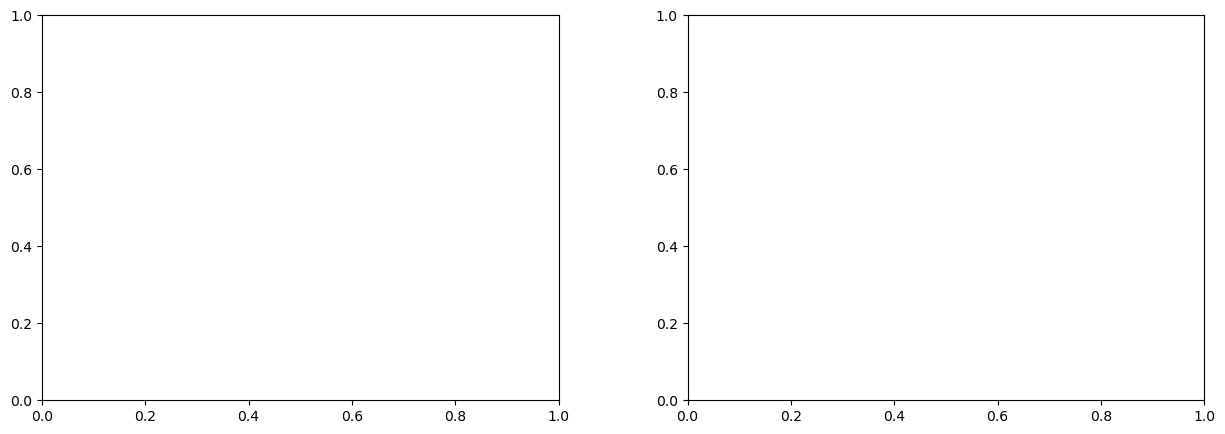

In [ ]:
xc=rbf.columns[-3]
yc=rbf.columns[-2]
x=rbf[xc]
y=rbf[yc]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.25)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Get the overall figure size
fig_width, fig_height = fig.get_size_inches()

# color_dict = {'Siemens': 'black', 'GE': 'blue'}
sns.scatterplot(x=xc, y=yc, data=rbf, hue='source', style='source', 
                markers=marker_dict, s=45,  ax=ax[0])
sns.regplot(x=xc, y=yc, data=rbf,  scatter=False,  line_kws={'color': 'black' ,'linewidth': 1.5}, ax=ax[0])

sns.move_legend(ax[0], "lower right",title='Site')
ax[0].annotate(f'R={r_value:.3f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=11, color='black')
ax[0].annotate(f'p={p_value:.3f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=11, color='black')

xc=rbf_one_twos.columns[-3]
yc=rbf_one_twos.columns[-2]
x=rbf_one_twos[xc]
y=rbf_one_twos[yc]
slope, intercept, r_value, p_value, std_err = linregress(x,y)
sns.scatterplot(x=xc, y=yc, data=rbf_one_twos, hue='source', style='source',
                markers=marker_dict, s=45,ax=ax[1]) #palette=color_dict,
sns.regplot(x=xc, y=yc, data=rbf_one_twos, scatter=False, line_kws={'color': 'black', 'linewidth': 1.5}, ax=ax[1])


ax[1].annotate(f'R={r_value:.3f}', xy=(0.08, 0.90), xycoords='axes fraction', fontsize=11, color='black')
ax[1].annotate(f'p={p_value:.3f}', xy=(0.08, 0.85), xycoords='axes fraction', fontsize=11, color='black')

for i in range(2):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_ylim(20, 100)
    ax[i].set_xlim(15, 100)
    ax[i].set_xlabel(' OBF from Session 1 (mL/100g/min)',fontsize=14, fontweight='bold')
    ax[i].set_ylabel(' OBF from Session 2 (mL/100g/min)',fontsize=14, fontweight='bold')
    sns.move_legend(ax[1], "lower right",title='Site')

fig.text(-0.15, 1.02, 'a', transform=ax[0].transAxes, 
         fontsize=15, fontweight='bold', va='bottom', ha='center')
fig.text(-0.15, 1.02, 'b', transform=ax[1].transAxes, 
         fontsize=15, fontweight='bold', va='bottom', ha='center')

# plt.tight_layout()
# plt.savefig('/Users/aliceqichaowu/Desktop/Detre_Lab/Sudipto_VCID_project/Figures/Figures2_test', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
plt.figure()

sns.relplot(x=x,y=y, hue='source',style="source",color='black')
slope, intercept, r_value, p_value, std_err = linregress(x,y)
coefficients = np.polyfit(x,y, 1)
poly_fit = np.poly1d(coefficients)
plt.plot(x, poly_fit(x), color='red')

plt.annotate(f'R={r_squared:.3f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12, color='black')
plt.annotate(f'p={p_value:.3f}*', xy=(0.05, 0.84), xycoords='axes fraction', fontsize=12, color='black')

plt.xlabel(' OBF from Session 1 (mL/100g/min))')
plt.ylabel(' OBF from Session 2 (mL/100g/min)')

plt.ylim(0,110)
# plt.xlim(0,110)
plt.title('Test–retest reliability of OBF measurements ')
plt.show()

ValueError: Could not interpret value `source` for `hue`. Value is a string, but `data` was not passed.

<Figure size 640x480 with 0 Axes>

In [ ]:
rbf_3s.head(5)


,subid_all,leftCBF_ses1,leftCBF_ses2,rightCBF_ses1,rightCBF_ses2,bilateralRBF_ses1,bilateralRBF_ses2,source
0,HC002,33.0,34.6,31.8,39.0,32.3,37.2,Siemens
1,HC003,55.1,73.9,57.7,56.9,56.2,63.8,Siemens
2,HC004,57.6,47.7,52.9,48.0,55.0,47.9,Siemens
3,HC005,61.2,46.0,67.1,50.4,64.2,48.0,Siemens
4,HC006,34.7,43.2,40.9,42.9,37.7,43.0,Siemens


In [ ]:
ratings = rating.pivot_table('Rating_asl', ['Subid'], 'Session')
ratings=ratings.dropna(how='any')
rbf_3s=rbf_3s.dropna(how='any')
rbf_18s=rbf_18s.dropna(how='any')
# cbf_reshape=cbf_reshape.dropna(how='any')


In [ ]:
def assign_group(name):
    if name.startswith('HC2') or name.startswith('G1'):
        return 'MH'
    elif name.startswith('HC3') or name.startswith('G2'):
        return 'OH'
    elif name.startswith('VD') or name.startswith('G3'):
        return 'SVD'
    else:
        return 'Other'

In [ ]:
rbf['Cohort'] = rbf['subid_all'].apply(assign_group).astype('category')
first_column = rbf.pop('Cohort')
rbf.insert(8,'Cohort',first_column)
# rbf = rbf[rbf['Cohort'] != 'SVD']

In [ ]:
rbf.shape

(36, 9)

In [ ]:
rbf=rbf_3s

In [ ]:
ratings = rating.pivot_table('Rating_asl', ['Subid'], 'Session')
ratings=ratings.dropna(how='any')
rows_with_twos = ratings[ratings.eq(2.0).all(axis=1)]
rows_with_ones = ratings[ratings.eq(1.0).any(axis=1)]
rows_with_ones_twos = ratings[ratings.isin([1.0,2.0]).all(axis=1)]

In [ ]:

rbf_twos=rbf.loc[rbf['subid_all'].isin(rows_with_twos.index)]
rbf_ones=rbf.loc[rbf['subid_all'].isin(rows_with_ones.index)]
rbf_twos=rbf.loc[rbf['subid_all'].isin(rows_with_twos.index)]
rbf_one_twos=rbf.loc[rbf['subid_all'].isin(rows_with_ones_twos.index)]

In [ ]:
rbf_penn=rbf[rbf['source']==1]
rbf_miami=rbf[rbf['source']==2]
rbf_penn.shape
rbf_miami.shape
rbf_all.columns

Index(['subid_all', 'leftCBF_ses1_x', 'leftCBF_ses2_x', 'rightCBF_ses1_x',
       'rightCBF_ses2_x', 'bilateralCBF_ses1_x', 'bilateralCBF_ses2_x',
       'source_x', 'leftCBF_ses1_y', 'leftCBF_ses2_y', 'rightCBF_ses1_y',
       'rightCBF_ses2_y', 'bilateralCBF_ses1_y', 'bilateralCBF_ses2_y',
       'source_y'],
      dtype='object')

In [ ]:
rbf_all = pd.merge(rbf_3s, rbf_18s, on=['subid_all','source'], how='inner')
rbf_all.columns[-2]

'bilateralCBF_ses1_y'

## Correlation plots

bilateralCBF_ses2_x bilateralCBF_ses2_y


/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

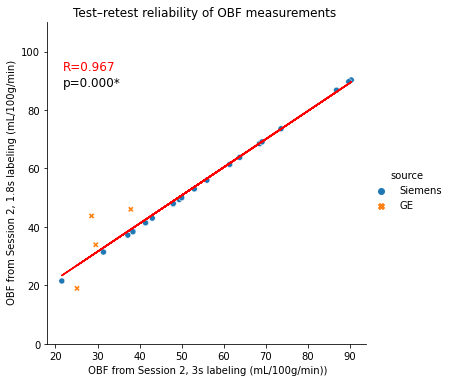

In [ ]:
## cbf with all images 
plt.figure()

xc=rbf_all.columns[6]
yc=rbf_all.columns[-1]
print(xc,yc)

x=rbf_all[xc]
y=rbf_all[yc]
sns.relplot(xc,yc, hue='source',data=rbf_all,style="source",color='black')
slope, intercept, r_value, p_value, std_err = linregress(x,y)
r_squared = r_value**2
coefficients = np.polyfit(x,y, 1)
poly_fit = np.poly1d(coefficients)
plt.plot(x, poly_fit(x), color='red')

plt.annotate(f'R={r_squared:.3f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='red')
plt.annotate(f'p={p_value:.3f}*', xy=(0.05, 0.80), xycoords='axes fraction', fontsize=12, color='black')


plt.xlabel(' OBF from Session 2, 3s labeling (mL/100g/min))')
plt.ylabel(' OBF from Session 2, 1.8s labeling (mL/100g/min)')


plt.ylim(0,110)
#     plt.xlim(0,110)
plt.title('Test–retest reliability of OBF measurements ')
plt.show()

bilateralCBF_ses1 bilateralCBF_ses2


/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

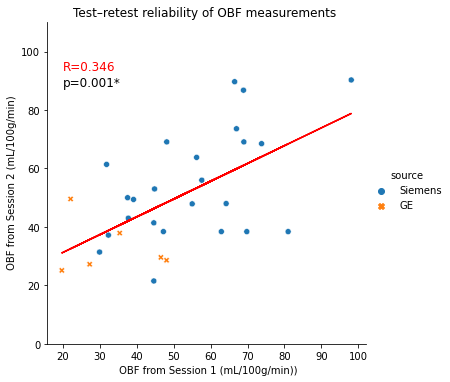

In [ ]:
## cbf with all images 

plt.figure()
xc=rbf.columns[-3]
yc=rbf.columns[-2]
print(xc,yc)

x=rbf[xc]
y=rbf[yc]
sns.relplot(xc,yc, hue='source',data=rbf,style="source",color='black')
slope, intercept, r_value, p_value, std_err = linregress(x,y)
r_squared = r_value**2
coefficients = np.polyfit(x,y, 1)
poly_fit = np.poly1d(coefficients)
plt.plot(x, poly_fit(x), color='red')

plt.annotate(f'R={r_squared:.3f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='red')
plt.annotate(f'p={p_value:.3f}*', xy=(0.05, 0.80), xycoords='axes fraction', fontsize=12, color='black')

plt.xlabel(' OBF from Session 1 (mL/100g/min))')
plt.ylabel(' OBF from Session 2 (mL/100g/min)')


plt.ylim(0,110)
#     plt.xlim(0,110)
plt.title('Test–retest reliability of OBF measurements ')
plt.show()

In [ ]:
for l, i in enumerate(range(len(cbf.columns)-2)):
    print(l,i+2)
cbf[cbf['Session']==1].iloc[1,2]

0 2
1 3
2 4


52.5

In [ ]:
rbf[rbf['Session']==1].iloc[:,0]

0        HC202
2        HC203
4        HC204
6        HC205
8        HC206
        ...   
35       G1047
37    G2014_V1
40    G2016_V1
45    G2027_V1
47    G2044_V1
Name: SUBID, Length: 63, dtype: object

In [ ]:
rbf[rbf['Session']==2].iloc[:,0]

1        HC202
3        HC203
5        HC204
7        HC205
9        HC206
        ...   
38    G2014_V1
41    G2016_V1
43    G2017_V1
46    G2027_V1
48    G2044_V1
Name: SUBID, Length: 64, dtype: object

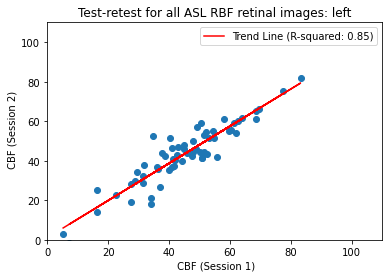

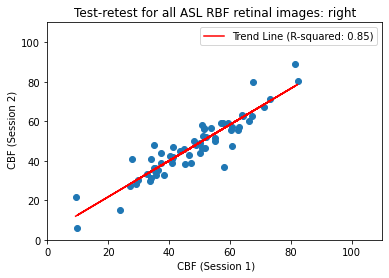

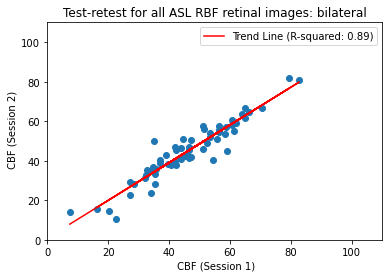

In [ ]:
## rbf with all images 
labels=['left','right','bilateral']

for l, i in enumerate(range(len(rbf.columns)-2)):
#     for l in range(3):
        plt.figure()
    #     ax=fig.add_subplot(3, 1, i+1)
        x=rbf[rbf['Session']==1].iloc[:,i+2]
        y=rbf[rbf['Session']==2].iloc[:,i+2]
        coefficients = np.polyfit(x,y, 1)
        poly_fit = np.poly1d(coefficients)
        y_pred = poly_fit(x)
        r_squared = r2_score(y, y_pred)
        plt.scatter(x,y)
        plt.plot(x, poly_fit(x), label=f'Trend Lin (R-squared: {r_squared:.2f})', color='red')

        plt.xlabel(' CBF (Session 1)')
        plt.ylabel(' CBF (Session 2)')


        plt.ylim(0,110)
        plt.xlim(0,110)
        plt.title('Test-retest for all ASL RBF retinal images: ' + labels[l] )
        plt.show()

In [ ]:
plt.title('Test-retest for OBF measurements (ratings of segmentation = 2)' )

/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


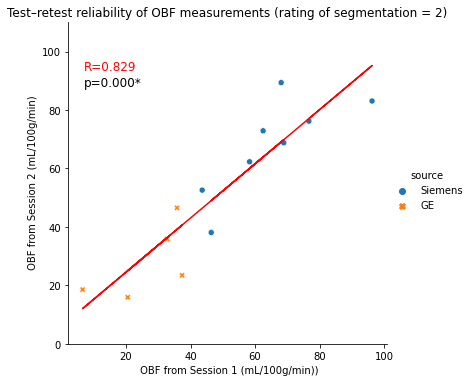

/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


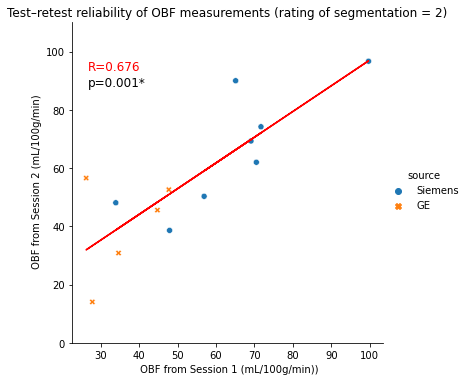

/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


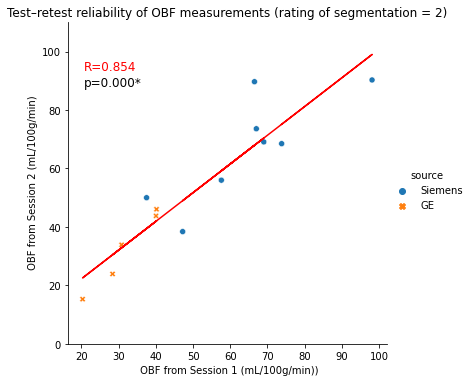

In [ ]:
## cbf with images rating = 2

for l,i in enumerate(range(1, len(rbf_twos.columns)-2,2)):
    xc=rbf_twos.columns[i]
    yc=rbf_twos.columns[i+1]
    x=rbf_twos[xc]
    y=rbf_twos[yc]
    sns.relplot(x,y, hue='source',data=rbf_twos,style="source")
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    r_squared = r_value**2
    coefficients = np.polyfit(x,y, 1)
    poly_fit = np.poly1d(coefficients)
    plt.plot(x, poly_fit(x), color='red')

    plt.annotate(f'R={r_squared:.3f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='red')
    plt.annotate(f'p={p_value:.3f}*', xy=(0.05, 0.80), xycoords='axes fraction', fontsize=12, color='black')

    plt.xlabel(' OBF from Session 1 (mL/100g/min))')
    plt.ylabel(' OBF from Session 2 (mL/100g/min)')

    plt.ylim(0,110)
#     plt.xlim(0,110)
    plt.title('Test–retest reliability of OBF measurements (rating of segmentation = 2)')
    plt.show()

/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

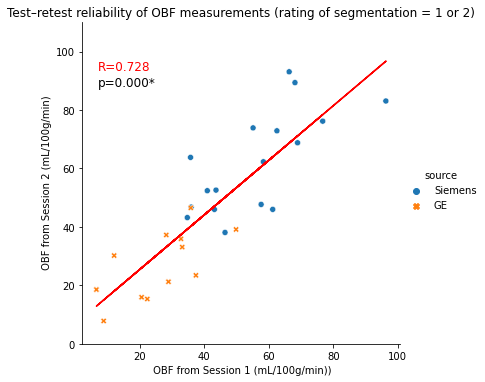

/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

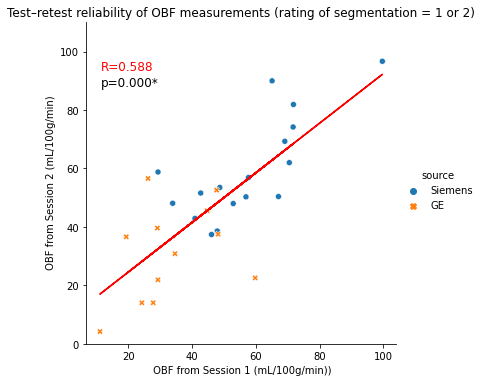

/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

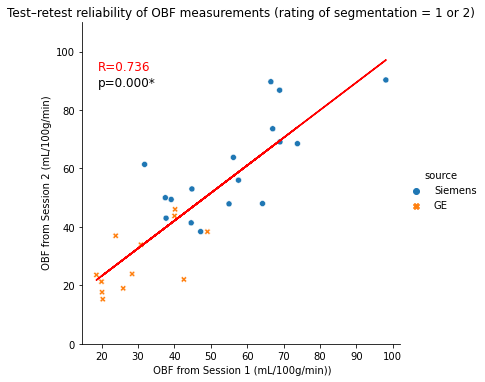

In [ ]:
## cbf with images rating = 1&2
for l,i in enumerate(range(1, len(rbf_one_twos.columns)-2, 2)):
    plt.figure()
    xc=rbf_one_twos.columns[i]
    yc=rbf_one_twos.columns[i+1]
    x=rbf_one_twos[xc]
    y=rbf_one_twos[yc]
    sns.relplot(x,y, hue='source',data=rbf_one_twos,style="source")
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    r_squared = r_value**2
    coefficients = np.polyfit(x,y, 1)
    poly_fit = np.poly1d(coefficients)
    plt.plot(x, poly_fit(x), color='red')

    plt.annotate(f'R={r_squared:.3f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='red')
    plt.annotate(f'p={p_value:.3f}*', xy=(0.05, 0.80), xycoords='axes fraction', fontsize=12, color='black')



    plt.xlabel(' OBF from Session 1 (mL/100g/min))')
    plt.ylabel(' OBF from Session 2 (mL/100g/min)')


    plt.ylim(0,110)
#     plt.xlim(0,110)
    plt.title('Test–retest reliability of OBF measurements (rating of segmentation = 1 or 2)')
    plt.show()


/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

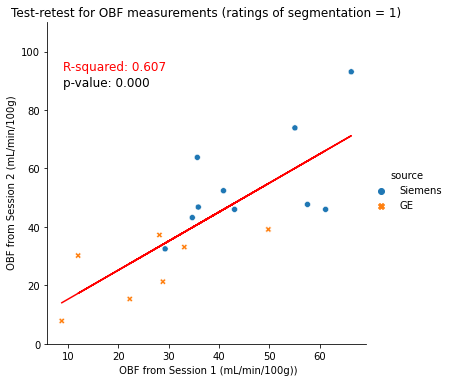

/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

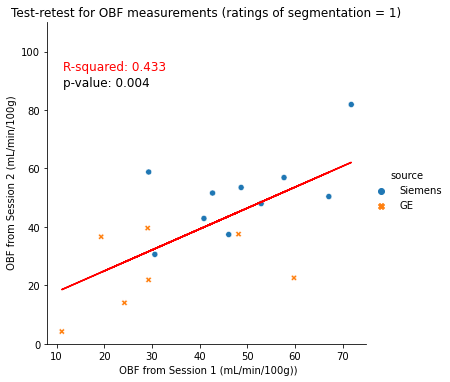

/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

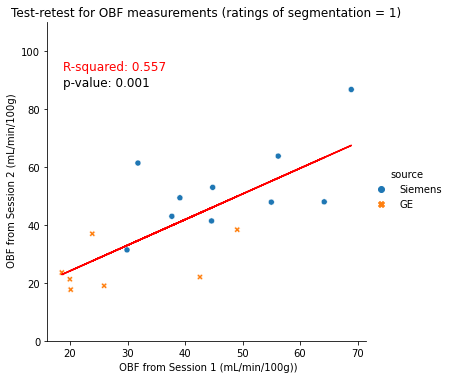

In [ ]:
## cbf with images rating = 1
for l,i in enumerate(range(1, len(rbf.columns)-2, 2)):
    plt.figure()
    xc=rbf_ones.columns[i]
    yc=rbf_ones.columns[i+1]
    x=rbf_ones[xc]
    y=rbf_ones[yc]
    sns.relplot(x,y, hue='source',data=rbf_ones,style="source")
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    r_squared = r_value**2
    coefficients = np.polyfit(x,y, 1)
    poly_fit = np.poly1d(coefficients)
    plt.plot(x, poly_fit(x), color='red')

    plt.annotate(f'R-squared: {r_squared:.3f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='red')
    plt.annotate(f'p-value: {p_value:.3f}', xy=(0.05, 0.80), xycoords='axes fraction', fontsize=12, color='black')



    plt.xlabel(' OBF from Session 1 (mL/min/100g))')
    plt.ylabel(' OBF from Session 2 (mL/min/100g)')


    plt.ylim(0,110)
    plt.title('Test-retest for OBF measurements (ratings of segmentation = 1)' )
    plt.show()

